In [1]:
import numpy as np
from matplotlib import pyplot as plt

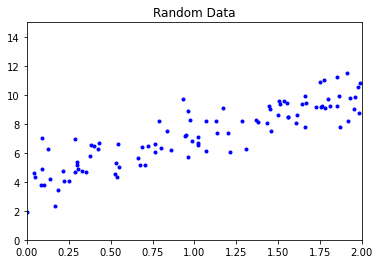

In [2]:
###4.1.1 정규방정식###
#https://mazdah.tistory.com/831
X = 2 * np.random.rand(100, 1) #0~1 사이의 균일분포 표준정규분포 난수 (100,1)행렬 생성
Y = 4 + 3 * X + np.random.randn(100, 1) #평균 0 표준편차 1인 가우시안 표준정규분포 난수 (100,1)행렬 생성

plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Random Data")
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] #모든 샘플에 x0 = 1을 추가, 입력특성 x0은 항상1이니까
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y) #정규방정식 공식적용, inv는 역행렬을 구해줌
theta_best

array([[4.14061735],
       [2.99918289]])

In [4]:
X_new = np.array([[0], [2]]) #예측할 데이터
X_new_b = np.c_[np.ones((2, 1)), X_new] #입력특성 x0은 항상 1
Y_predict = X_new_b.dot(theta_best) #정규방적식을 사용해 예측
Y_predict #예측값 출력

array([[ 4.14061735],
       [10.13898313]])

In [6]:
##같은 작업을 하는 사이킷런 코드##
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict([[0], [2]])

array([[ 4.14061735],
       [10.13898313]])

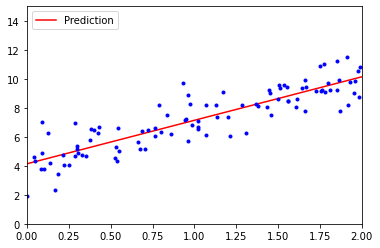

In [7]:
#정규방정식을 그래프에 표현
plt.plot(X_new, Y_predict, "r-", label="Prediction")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

In [36]:
###4.2 경사하강법###
eta = 0.1 #학습률
n_iterations = 1000 #학습반복 횟수
m = 100

theta = np.random.randn(2, 1) #평균 0, 표준편차 1인 가우시안 정규분포 난수 (2,1)행렬 생성

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y) #비용함수의 편도함수(비용함수 미분한 것)
    theta = theta - eta * gradients #가중치 업데이트

theta

array([[4.14061735],
       [2.99918289]])

15


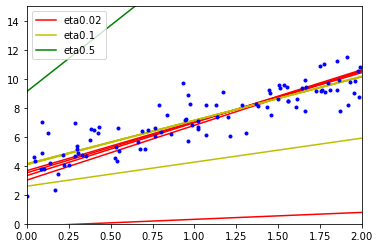

In [40]:
#학습률 차이의 결과
etas = [0.02, 0.1, 0.5] #학습률
formula = []

for lr in etas:
    theta = np.random.randn(2, 1) #평균 0, 표준편차 1인 가우시안 정규분포 난수 (2,1)행렬 생성
    for iteration in range(200):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y) #비용함수의 편도함수(비용함수 미분한 것)
        theta = theta - lr * gradients #가중치 업데이트
        if iteration % 40 == 0:
            formula.append(theta)
            
print(len(formula))

#최적해에 아직 도달못함
plt.plot([0, 2], [formula[0][1] * x + formula[0][0] for x in [0, 2]], "r-", label="eta0.02")
plt.plot([0, 2], [formula[1][1] * x + formula[1][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[2][1] * x + formula[2][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[3][1] * x + formula[3][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[4][1] * x + formula[4][0] for x in [0, 2]], "r-")

#최적해에 도달
plt.plot([0, 2], [formula[5][1] * x + formula[5][0] for x in [0, 2]], "y-", label="eta0.1")
plt.plot([0, 2], [formula[6][1] * x + formula[6][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[7][1] * x + formula[7][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[8][1] * x + formula[8][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[9][1] * x + formula[9][0] for x in [0, 2]], "y-")

#최적해를 건너뜀
plt.plot([0, 2], [formula[10][1] * x + formula[10][0] for x in [0, 2]], "g-", label="eta0.5")
plt.plot([0, 2], [formula[11][1] * x + formula[11][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[12][1] * x + formula[12][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[13][1] * x + formula[13][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[14][1] * x + formula[14][0] for x in [0, 2]], "g-")

plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

In [19]:
###4.2.2 확률적 경사 하강법###
n_epochs = 50 #몇개의 훈련세트를 반복학습 할 건지
t0, t1 = 5, 50 #학습스케줄 하이퍼파라미터

def learning_schedule(t): #무작위성으로 인해 전역최소값을 지나치는 경우 방지
    return t0 / (t + t1) #시간이 지날수록 학습률 감소시킴, 어닐링(annealing)

theta = np.random.randn(2, 1) #가중치

for epoch in range(n_epochs):
    for i in range(m): #m개의 샘플 추출
        random_index = np.random.randint(m) #무작위로 추출할 샘플의 인덱스
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.08188775],
       [3.04451204]])

In [49]:
##사이킷런의 SGD클래스 사용##
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #학습스케줄에 의해 학습률이 자동으로 줄어듬
sgd_reg.fit(X, Y.ravel()) #ravel함수는 다차원배열을 1차원으로 변환함
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12378587]), array([3.00330083]))

In [63]:
### 4.3다항회귀 ###
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #노이즈가 섞인 2차 방정식형태의 데이터생성

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #2차방정식, 편향을 위한 특성(x0 = 1)추가 안함
X_poly = poly_features.fit_transform(X) #훈련세트에 있는 특성을 제곱해서 새로운 특성으로 추가
print(X[0])
print(X_poly[0]) #원래특성, 제곱한특성

[-2.45801338]
[-2.45801338  6.04182979]


In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y, None)
lin_reg.intercept_, lin_reg.coef_

(array([1.95997475]), array([[1.02028582, 0.4748089 ]]))

In [ ]:
#PolynomialFeatures에서 interaction_only=False로 지정하면 거듭제곱이 포함된 항은 제외됨
poly_features.get_feature_names() #만들어진 특성의 차수 확인